In [1]:
# Import dependices
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

According to the size anomaly, the firms with below median market cap should earn higher returns on average.

In [146]:
# Read fundamental data
tickers = pd.read_csv('symbols_nasdaq.csv')

In [148]:
# Randomly sample 1000 ticker for small and large cap respectively
market_median = tickers['Market Cap'].median()
small_cap_ticks = tickers[tickers['Market Cap'] < market_median].Symbol.sample(1000).to_list()
large_cap_ticks = tickers[tickers['Market Cap'] >= market_median].Symbol.sample(1000).to_list()

# Get the annual average return 
returns = {}
for t in small_cap_ticks:
    tick = yf.Ticker(t)
    try:
        hist = tick.history(period="max")['Close'].pct_change(1).resample('1Y').mean()
        returns[t] = hist
    except:
        pass
    
for t in large_cap_ticks:
    tick = yf.Ticker(t)
    try:
        hist = tick.history(period="max")['Close'].pct_change(1).resample('1Y').mean()
        returns[t] = hist
    except:
        pass
    
returns = pd.DataFrame(returns)

- ETX           : No data found, symbol may be delisted
- MBTCR: No data found for this date range, symbol may be delisted
- ENERR: No data found for this date range, symbol may be delisted
- GBRGR: No data found for this date range, symbol may be delisted
- SAND          : No data found, symbol may be delisted
- ECOM          : No data found, symbol may be delisted


In [195]:
nonnull = returns.columns[returns.isnull().sum() / len(returns) < .63].to_list()

In [196]:
nonnull

['UNAM',
 'SFE',
 'MPA',
 'INTG',
 'UBCP',
 'ENG',
 'BSQR',
 'CLWT',
 'PDEX',
 'MGF',
 'MCBC',
 'IMMR',
 'ASXC',
 'ELLO',
 'PFD',
 'TAIT',
 'CYAN',
 'FDBC',
 'AEY',
 'CMCT',
 'GCV',
 'OBCI',
 'DSM',
 'OMEX',
 'SRGA',
 'ESBK',
 'AUTO',
 'KVHI',
 'GBR',
 'NPV',
 'CVM',
 'PEBK',
 'FCCO',
 'INFI',
 'NOM',
 'SMIT',
 'BIOL',
 'FNHC',
 'SPPI',
 'RGS',
 'PESI',
 'VIRC',
 'VOXX',
 'NNY',
 'UEPS',
 'USEG',
 'CHMG',
 'ECF',
 'PIM',
 'OBLG',
 'BKYI',
 'GTIM',
 'MCR',
 'STCN',
 'SMED',
 'TAYD',
 'GLBZ',
 'NAVB',
 'MNP',
 'SRT',
 'ALOT',
 'ORRF',
 'KOSS',
 'REFR',
 'PPIH',
 'BKTI',
 'MTR',
 'CFBK',
 'UNB',
 'NYMX',
 'NIM',
 'DAKT',
 'WLFC',
 'EML',
 'SWKH',
 'CPSH',
 'LCI',
 'SJT',
 'CVV',
 'CMT',
 'OBAS',
 'TVE',
 'BMRA',
 'DDT',
 'RAVE',
 'HWBK',
 'GIFI',
 'MMT',
 'FLL',
 'PCYO',
 'NICK',
 'EEA',
 'IVC',
 'PEI',
 'NMT',
 'LAWS',
 'CHNR',
 'ATLO',
 'GVP',
 'SUP',
 'BKT',
 'FARM',
 'WEYS',
 'EP',
 'LYTS',
 'INOD',
 'NSL',
 'AATC',
 'GIGM',
 'LXRX',
 'PTN',
 'AEF',
 'NRIM',
 'JAKK',
 'NVEC',
 'AP',
 

In [212]:
# Remove some symbols that does not exsist in dataframe
small_cap_ticks = [i for i in returns.columns if i in small_cap_ticks] 
large_cap_ticks = [i for i in returns.columns if i in large_cap_ticks] 

In [213]:
# Calculate the mean of small and large cap stocks respectively
df = pd.DataFrame()
df['Small Cap'] = returns[small_cap_ticks].mean(axis=1)
df['Large Cap'] = returns[large_cap_ticks].mean(axis=1)

In [214]:
# Restructure the dataframe into desired format
df.reset_index(inplace=True)
df['Date'] = df['Date'].dt.year
df.set_index('Date', inplace=True)
df = df.melt(ignore_index=False)
df.reset_index(inplace=True)

In [215]:
df

,Date,variable,value
0,1962,Small Cap,NaN
1,1963,Small Cap,NaN
2,1964,Small Cap,NaN
3,1965,Small Cap,NaN
4,1966,Small Cap,NaN
...,...,...,...
117,2018,Large Cap,-0.000178
118,2019,Large Cap,0.001083
119,2020,Large Cap,0.001038
120,2021,Large Cap,0.001231


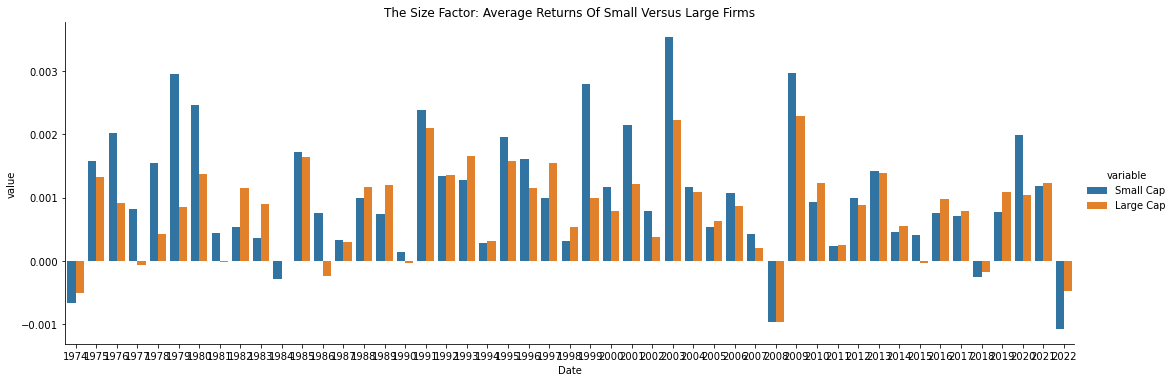

In [216]:
sns.catplot(data=df[df.Date > 1973], x='Date', y='value', hue='variable', kind='bar', aspect=3)
plt.title("The size factor: average returns of small versus large firms".title())
plt.show()

Around 65.31% of the time, size anomalies hold true.